In [25]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook  
%matplotlib inline 
import astropy
from astropy import units as u
import astropy.table as Table
from astropy.table import QTable
from astropy.io import ascii
from astropy.io import fits
from dust_extinction.dust_extinction import F99
import scipy.interpolate as interp
from synphot import units
from synphot import SourceSpectrum,SpectralElement,Observation,ExtinctionModel1D,Empirical1D

Kevin, if you don't have dust_extinction and synphot, the easiest way I've found to install them is with pip install... KAL

In [33]:
hdulist = fits.open('AATau_flux_tell_iraf_nir.fits')
# hdulist.info()
# hdulist[0].header
print(hdulist[0].header['BUNIT'])
print(hdulist[0].header['CUNIT1'])
hdulist.close()

erg/s/cm2/Angstrom
nm


These flux units must be incorrect... off by factor 10.

In [49]:
hdulist = fits.open('AATau_flux_tell_iraf_nir.fits')
# hdulist.info()
# hdulist[0].header
data=hdulist[0].data
start=hdulist[0].header['CRVAL1']
step=hdulist[0].header['CDELT1']
wave_iraf_nir=np.arange(start,start+step*data.size,step)* u.nm
data_iraf_nir=hdulist[0].data * u.erg/(u.s*u.cm*u.cm*u.AA)
hdulist.close()

hdulist = fits.open('AATau_flux_tell_iraf_vis.fits')
# hdulist.info()
# hdulist[0].header
data=hdulist[0].data
start=hdulist[0].header['CRVAL1']
step=hdulist[0].header['CDELT1']
wave_iraf_vis=np.arange(start,start+step*data.size,step)* u.nm
data_iraf_vis=hdulist[0].data * u.erg/(u.s*u.cm*u.cm*u.AA)
hdulist.close()

hdulist = fits.open('AATau_flux_tell_nir.fits')
# hdulist.info()
# hdulist[0].header
data=hdulist[0].data
start=hdulist[0].header['CRVAL1']
step=hdulist[0].header['CDELT1']
wave_nir=np.arange(start,start+step*data.size,step)* u.nm
data_nir=hdulist[0].data * u.erg/(u.s*u.cm*u.cm*u.AA)
hdulist.close()

hdulist = fits.open('AATau_flux_tell_vis.fits')
# hdulist.info()
# hdulist[0].header
data=hdulist[0].data
start=hdulist[0].header['CRVAL1']
step=hdulist[0].header['CDELT1']
wave_vis=np.arange(start,start+step*data.size,step)* u.nm
data_vis=hdulist[0].data * u.erg/(u.s*u.cm*u.cm*u.AA)
hdulist.close()

hdulist = fits.open('AATau_flux_uvb.fits')
# hdulist.info()
# hdulist[0].header
data=hdulist[0].data
start=hdulist[0].header['CRVAL1']
step=hdulist[0].header['CDELT1']
wave_uvb=np.arange(start,start+step*data.size,step)* u.nm
data_uvb=hdulist[0].data * u.erg/(u.s*u.cm*u.cm*u.AA)
hdulist.close()


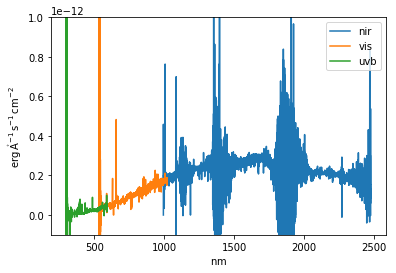

In [50]:
from astropy.visualization import quantity_support
quantity_support()  

plt.plot(wave_nir,data_nir,label='nir')
plt.plot(wave_vis,data_vis,label='vis')
# plt.plot(wave_iraf_nir,data_iraf_nir,label='1')
# plt.plot(wave_iraf_vis,data_iraf_vis,label='2')
plt.plot(wave_uvb,data_uvb,label='uvb')
plt.ylim(-1E-13,1E-12)
plt.legend(loc='best')
plt.show()

In [51]:
uvb = QTable()
uvb["wav"]=wave_uvb
uvb["flux"]=data_uvb
vis = QTable()
vis["wav"]=wave_vis
vis["flux"]=data_vis
nir = QTable()
nir["wav"]=wave_nir
nir["flux"]=data_nir

xshooter = Table.vstack([uvb, vis, nir])
xshooter

wav,flux
nm,erg / (Angstrom cm2 s)
float64,float32
298.92,0.0
298.94,3.4003932262034178e-15
298.96,-1.377128527315849e-14
298.97999999999996,1.1539541498457699e-14
298.99999999999994,-7.271456826691159e-15
299.0199999999999,1.7199547789150706e-14
299.0399999999999,5.7236637812944826e-15
299.0599999999999,1.3444887903197623e-14


In [52]:
data1 = ascii.read('AATau_IR2008.txt')
data2 = ascii.read('AATau_opt2008.txt')
data = Table.vstack([data2, data1])
allwav_2008=data['wavelength']
alldata_2008=data['flux']

data1 = ascii.read('AATau_IR2014dec02.txt')
data2 = ascii.read('AATau_opt2014dec02.txt')
data = Table.vstack([data2, data1])
allwav_dec02=data['wavelength']
alldata_dec02=data['flux']

data1 = ascii.read('AATau_IR2014dec12.txt')
data2 = ascii.read('AATau_opt2014dec12.txt')
data = Table.vstack([data2, data1])
allwav_dec12=data['wavelength']
alldata_dec12=data['flux']

In [53]:
allwav_2008

<Quantity [0.320097 , 0.320201 , 0.320305 , ..., 2.4703074, 2.470591 ,
           2.4708748] micron>

In [54]:
interp2008=interp.interp1d(allwav_2008,alldata_2008)
alldata_2008,interp2008(allwav_2008)*alldata_2008.unit

(<Quantity [6.5482902e-15, 1.3214700e-14, 8.4366303e-15, ..., 1.6981821e-14,
            1.7001905e-14, 1.6815852e-14] erg / (Angstrom cm2 s)>,
 <Quantity [6.5482902e-15, 1.3214700e-14, 8.4366303e-15, ..., 1.6981821e-14,
            1.7001905e-14, 1.6815852e-14] erg / (Angstrom cm2 s)>)

## Dec 02 Spectra

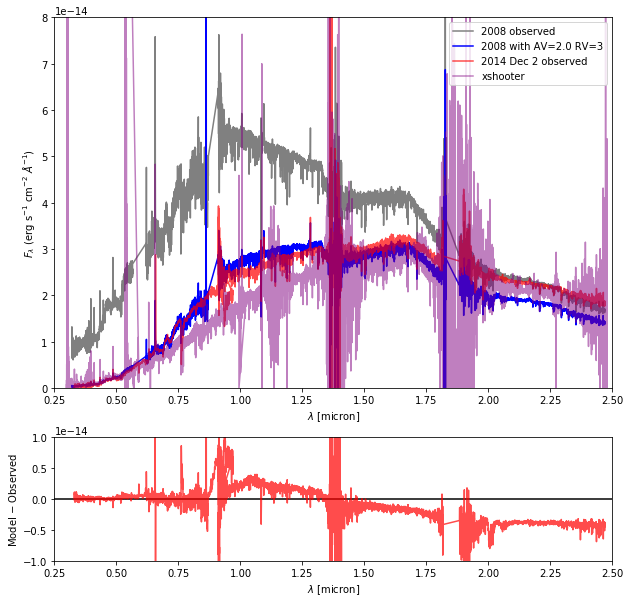

In [55]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10),gridspec_kw = {'height_ratios':[3, 1]})

ext=F99(Rv=3.0)

ax1.plot(allwav_2008,alldata_2008,'grey',label='2008 observed')
ax1.plot(allwav_2008,alldata_2008*ext.extinguish(allwav_2008,Av=2.0),'blue',
         label="2008 with AV=2.0 RV=3")
ax1.plot(allwav_dec02,alldata_dec02,'red',label='2014 Dec 2 observed',alpha=0.7)
ax1.plot(xshooter['wav'].to(u.micron),xshooter['flux']/10.,'purple',alpha=0.5,label='xshooter')
ax1.set_ylim(0,0.8E-13)
ax1.set_xlim(0.25,2.5)
ax1.set_xlabel('$\lambda$ [micron]')
ax1.set_ylabel('$F_\lambda$ (erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
ax1.legend(loc='upper right')

ax2.plot([.25,2.5],[0,0],'k')
ax2.plot(allwav_dec02,
         interp2008(allwav_dec02)*alldata_2008.unit*ext.extinguish(allwav_dec02,Av=2.0)
         -alldata_dec02,'r',alpha=0.7)
ax2.set_xlim(0.25,2.5)
ax2.set_ylim(-1E-14,1E-14)
ax2.set_xlabel('$\lambda$ [micron]')
ax2.set_ylabel('Model $-$ Observed')

plt.show()

## Dec 12 spectra

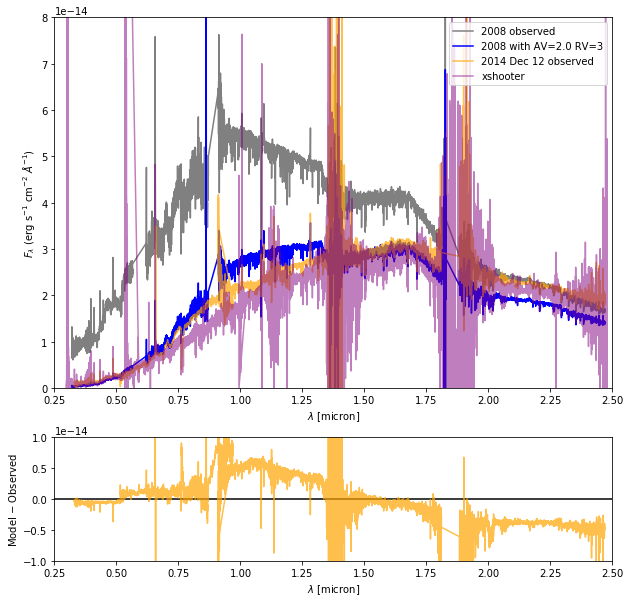

In [56]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10),gridspec_kw = {'height_ratios':[3, 1]})

ext=F99(Rv=3.0)

ax1.plot(allwav_2008,alldata_2008,'grey',label='2008 observed')
ax1.plot(allwav_2008,alldata_2008*ext.extinguish(allwav_2008,Av=2.0),'blue',
         label="2008 with AV=2.0 RV=3")
ax1.plot(allwav_dec12,alldata_dec12,'orange',label='2014 Dec 12 observed',alpha=0.7)
ax1.plot(xshooter['wav'].to(u.micron),xshooter['flux']/10.,'purple',alpha=0.5,label='xshooter')
ax1.set_ylim(0,0.8E-13)
ax1.set_xlim(0.25,2.5)
ax1.set_xlabel('$\lambda$ [micron]')
ax1.set_ylabel('$F_\lambda$ (erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
ax1.legend(loc='upper right')


allwav_dec12clip = allwav_dec12[allwav_dec12<2.47*u.micron]
alldata_dec12clip= alldata_dec12[allwav_dec12<2.47*u.micron]

ax2.plot([.25,2.5],[0,0],'k')
ax2.plot(allwav_dec12clip,
         interp2008(allwav_dec12clip)*alldata_2008.unit*ext.extinguish(allwav_dec12clip,Av=2.0)
         -alldata_dec12clip,'orange',alpha=0.7)
ax2.set_xlim(0.25,2.5)
ax2.set_ylim(-1E-14,1E-14)
ax2.set_xlabel('$\lambda$ [micron]')
ax2.set_ylabel('Model $-$ Observed')

plt.show()

## Colors

In [57]:
# Some massaging for synphot:
xshooter.sort('wav')

# The overlaps in the spectra are not tolerated by synphot, so we sort them:
allwav_2008s=allwav_2008[np.argsort(allwav_2008)]
alldata_2008s=alldata_2008[np.argsort(allwav_2008)]

allwav_dec02s=allwav_dec02[np.argsort(allwav_dec02)]
alldata_dec02s=alldata_dec02[np.argsort(allwav_dec02)]

allwav_dec12s=allwav_dec12[np.argsort(allwav_dec12)]
alldata_dec12s=alldata_dec12[np.argsort(allwav_dec12)]

# By coincidence, some wavelengths are identical, so we nudge them a bit:
# WARNING!  HARD WIRED!
allwav_dec02s[2405]=np.float32(0.934964)*u.micron
allwav_dec12s[2166]=np.float32(0.913868)*u.micron
allwav_dec12s[2484]=np.float32(0.941703)*u.micron


In [58]:
fobs1ext=dict()

j=0

for A in [2.0,4.0]:
    for R in [2.0,3.0,5.0]:
        ext=F99(Rv=R)
        fobs1ext[j]=alldata_2008s*ext.extinguish(allwav_2008s,Av=A)
        j+=1    
        

In [59]:
# Optional, for when the STScI ftp server is not answering:
from synphot import config
config.conf.vega_file='http://ssb.stsci.edu/cdbs/calspec/alpha_lyr_stis_008.fits'
config.conf.johnson_u_file='http://ssb.stsci.edu/cdbs/comp/nonhst/johnson_u_004_syn.fits'
config.conf.johnson_b_file='http://ssb.stsci.edu/cdbs/comp/nonhst/johnson_b_004_syn.fits'
config.conf.johnson_v_file='http://ssb.stsci.edu/cdbs/comp/nonhst/johnson_v_004_syn.fits'
config.conf.johnson_r_file='http://ssb.stsci.edu/cdbs/comp/nonhst/johnson_r_003_syn.fits'
config.conf.johnson_i_file='http://ssb.stsci.edu/cdbs/comp/nonhst/johnson_i_003_syn.fits'
config.conf.bessel_j_file='http://ssb.stsci.edu/cdbs/comp/nonhst/bessell_j_003_syn.fits'
config.conf.bessel_h_file='http://ssb.stsci.edu/cdbs/comp/nonhst/bessell_h_004_syn.fits'
config.conf.bessel_k_file='http://ssb.stsci.edu/cdbs/comp/nonhst/bessell_k_003_syn.fits'

vega = SourceSpectrum.from_vega()
u_band = SpectralElement.from_filter('johnson_u')
b_band = SpectralElement.from_filter('johnson_b')
v_band = SpectralElement.from_filter('johnson_v')
r_band = SpectralElement.from_filter('johnson_r')
i_band = SpectralElement.from_filter('johnson_i')
j_band = SpectralElement.from_filter('bessel_j')
h_band = SpectralElement.from_filter('bessel_h')
k_band = SpectralElement.from_filter('bessel_k')


In [63]:
bands = [k_band,h_band,j_band,i_band,r_band,v_band,b_band]

mags1ext=np.zeros((6,7))

mags1=np.zeros(7)
mags2=np.zeros(7)
mags3=np.zeros(7)
mags4=np.zeros(7)

for j in [0,1,2,3,4,5,6]:
    sp = SourceSpectrum(Empirical1D, points=allwav_2008s, lookup_table=alldata_2008s, keep_neg=False)
    sp_obs = Observation(sp, bands[j])
    mags1[j]=sp_obs.effstim(flux_unit='vegamag', vegaspec=vega).value
    sp = SourceSpectrum(Empirical1D, points=allwav_dec02s, lookup_table=alldata_dec02s, keep_neg=False)
    sp_obs = Observation(sp, bands[j])
    mags2[j]=sp_obs.effstim(flux_unit='vegamag', vegaspec=vega).value
    sp = SourceSpectrum(Empirical1D, points=allwav_dec12s, lookup_table=alldata_dec12s, keep_neg=False)
    sp_obs = Observation(sp, bands[j])
    mags3[j]=sp_obs.effstim(flux_unit='vegamag', vegaspec=vega).value

    sp = SourceSpectrum(Empirical1D, points=xshooter['wav'], lookup_table=xshooter['flux']/10, keep_neg=False)
    sp_obs = Observation(sp, bands[j])
    mags4[j]=sp_obs.effstim(flux_unit='vegamag', vegaspec=vega).value

    for i in range(6):
        sp = SourceSpectrum(Empirical1D, points=allwav_2008s, lookup_table=fobs1ext[i], keep_neg=False)
        sp_obs = Observation(sp, bands[j])
        mags1ext[i,j] = sp_obs.effstim(flux_unit='vegamag', vegaspec=vega).value
    

  points: [13619.504 13621.229 13622.954 13624.678 13807.297 13809.017 13826.228
 13827.947 13924.257 18204.887 18264.535]
  lookup_table: [-0.06155703 -0.16120483 -0.2462627  -0.06569865 -0.03514313 -0.01424272
 -0.01983138 -0.03685726 -0.00325952 -0.02674026 -0.01405363] [synphot.models]
  points: [ 3303.44    3305.8198  3308.2     3312.96    3315.34    3317.72
  3327.24    3334.3801  3336.76    3339.1401  3341.52    3346.2798
  3353.42    3367.7     3370.08    3372.46    3374.84    3377.22
  3386.74    3389.12    3403.4     3405.7798  3408.16    3415.3
  3417.68    3422.44    3424.82    3429.58    3431.96    3450.9998
  3472.42    3515.26    3524.78    3534.3     3643.78    3646.1602
  3648.54   13610.7    13615.8    13617.601  13619.3    13621.
 13622.7    13624.5    13626.2    13645.199  13646.899  13648.601
 13676.2    13677.899  13679.6    13681.399  13683.1    13684.8
 13710.7    13805.4    13807.1    13808.8    13824.3    13825.999
 13827.699  13829.499  13881.101  13924.     

In [72]:
#sp_obs = Observation(sp, k_band)
#sp_obs.plot()


In [64]:
mags1[::-1],mags2[::-1],mags2[::-1]-mags1[::-1]

(array([13.99366631, 12.84902046, 11.57235532, 10.54233954,  9.4796061 ,
         8.63775381,  8.12545762]),
 array([16.58947888, 14.84816432, 12.84199828, 11.49856709, 10.03621318,
         8.90018651,  8.1190166 ]),
 array([ 2.59581257,  1.99914386,  1.26964295,  0.95622755,  0.55660708,
         0.2624327 , -0.00644102]))

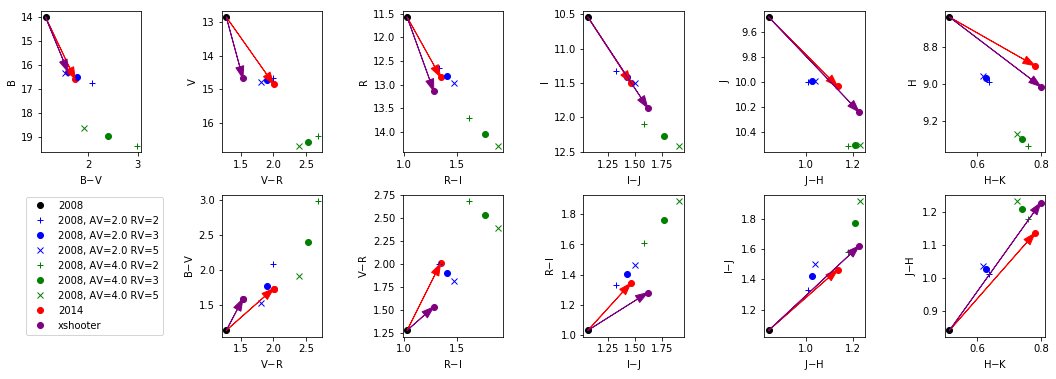

In [69]:
fig,axes=plt.subplots(2,6,figsize=(18,6))

bands=['K','H','J','I','R','V','B']

for j in [0,1,2,3,4,5]: # just data
    if j!=5:
        axes[1,5-j].plot(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1],'o',color='red')
        axes[1,5-j].plot(mags4[j+1]-mags4[j],mags4[j+2]-mags4[j+1],'o',color='purple')
        
        axes[1,5-j].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1]), xycoords='data',
            xytext=(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1]),textcoords='data',
            arrowprops=dict(color='red',headwidth=8,headlength=12,width=0.1))

        axes[1,5-j].annotate("",xy=(mags4[j+1]-mags4[j],mags4[j+2]-mags4[j+1]), xycoords='data',
            xytext=(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1]),textcoords='data',
            arrowprops=dict(color='purple',headwidth=8,headlength=12,width=0.1))

        axes[1,5-j].plot(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1],'o',color='black',label='2008')
        axes[1,5-j].set_xlabel(bands[j+1]+'$-$'+bands[j])
        axes[1,5-j].set_ylabel(bands[j+2]+'$-$'+bands[j+1])
                        
    
    axes[0,5-j].plot(mags1[j+1]-mags1[j],mags1[j+1],'o',color='black')
    axes[0,5-j].plot(mags2[j+1]-mags2[j],mags2[j+1],'o',color='red')
    axes[0,5-j].plot(mags4[j+1]-mags4[j],mags4[j+1],'o',color='purple')
    axes[0,5-j].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j+1]), xycoords='data',
            xytext=(mags1[j+1]-mags1[j],mags1[j+1]),textcoords='data',
            arrowprops=dict(color='red',headwidth=8,headlength=12,width=0.1))
    axes[0,5-j].annotate("",xy=(mags4[j+1]-mags4[j],mags4[j+1]), xycoords='data',
            xytext=(mags1[j+1]-mags1[j],mags1[j+1]),textcoords='data',
            arrowprops=dict(color='purple',headwidth=8,headlength=12,width=0.1))

    axes[0,5-j].set_xlabel(bands[j+1]+'$-$'+bands[j])
    axes[0,5-j].set_ylabel(bands[j+1])
    

for j in [0,1,2,3,4,5]: # extinction 
    if j!=5:
        axes[1,5-j].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j+2]-mags1ext[0,j+1],'+',color='blue',label='2008, AV=2.0 RV=2')
        axes[1,5-j].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j+2]-mags1ext[1,j+1],'o',color='blue',label='2008, AV=2.0 RV=3')
        axes[1,5-j].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j+2]-mags1ext[2,j+1],'x',color='blue',label='2008, AV=2.0 RV=5')
        axes[1,5-j].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j+2]-mags1ext[3,j+1],'+',color='green',label='2008, AV=4.0 RV=2')
        axes[1,5-j].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j+2]-mags1ext[4,j+1],'o',color='green',label='2008, AV=4.0 RV=3')
        axes[1,5-j].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j+2]-mags1ext[5,j+1],'x',color='green',label='2008, AV=4.0 RV=5')

    axes[0,5-j].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j+1],'+',color='blue')
    axes[0,5-j].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j+1],'o',color='blue')
    axes[0,5-j].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j+1],'x',color='blue')
    axes[0,5-j].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j+1],'+',color='green')
    axes[0,5-j].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j+1],'o',color='green')
    axes[0,5-j].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j+1],'x',color='green')
    

axes[1,1].plot(mags2[5]-mags2[4],mags2[6]-mags2[5],'o',color='red',label='2014') # just for the legend
axes[1,1].plot(mags4[5]-mags4[4],mags4[6]-mags4[5],'o',color='purple',label='xshooter')
axes[1,0].axis('off')
fig.subplots_adjust(wspace=0.8,hspace=0.3)
axes[1,1].legend(loc='center left', bbox_to_anchor=(-2, 0.5))
for j in [0,1,2,3,4,5]:
    axes[0,5-j].set_ylim(axes[0,5-j].get_ylim()[::-1])

plt.show()



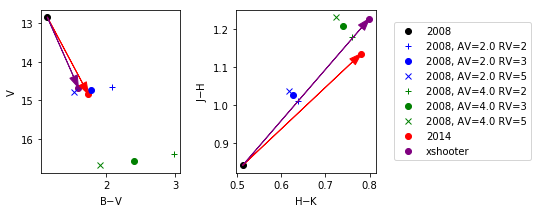

In [71]:
fig,axes=plt.subplots(1,2,figsize=(6,3))

j=5
axes[0].plot(mags1[j+1]-mags1[j],mags1[j],'o',color='black')
axes[0].plot(mags2[j+1]-mags2[j],mags2[j],'o',color='red')
axes[0].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j]),textcoords='data',
    arrowprops=dict(color='red',headwidth=8,headlength=12,width=0.1))
axes[0].plot(mags4[j+1]-mags4[j],mags4[j],'o',color='purple')
axes[0].annotate("",xy=(mags4[j+1]-mags4[j],mags4[j]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j]),textcoords='data',
    arrowprops=dict(color='purple',headwidth=8,headlength=12,width=0.1))
axes[0].set_xlabel(bands[j+1]+'$-$'+bands[j])
axes[0].set_ylabel(bands[j])

axes[0].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j],'+',color='blue')
axes[0].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j],'o',color='blue')
axes[0].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j],'x',color='blue')
axes[0].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j],'+',color='green')
axes[0].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j],'o',color='green')
axes[0].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j],'x',color='green')


j=0     
axes[1].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1]),textcoords='data',
    arrowprops=dict(color='red',headwidth=8,headlength=12,width=0.1))
axes[1].annotate("",xy=(mags4[j+1]-mags4[j],mags4[j+2]-mags4[j+1]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1]),textcoords='data',
    arrowprops=dict(color='purple',headwidth=8,headlength=12,width=0.1))
axes[1].plot(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1],'o',color='black',label='2008')
axes[1].set_xlabel(bands[j+1]+'$-$'+bands[j])
axes[1].set_ylabel(bands[j+2]+'$-$'+bands[j+1])

axes[1].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j+2]-mags1ext[0,j+1],'+',color='blue',label='2008, AV=2.0 RV=2')
axes[1].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j+2]-mags1ext[1,j+1],'o',color='blue',label='2008, AV=2.0 RV=3')
axes[1].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j+2]-mags1ext[2,j+1],'x',color='blue',label='2008, AV=2.0 RV=5')
axes[1].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j+2]-mags1ext[3,j+1],'+',color='green',label='2008, AV=4.0 RV=2')
axes[1].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j+2]-mags1ext[4,j+1],'o',color='green',label='2008, AV=4.0 RV=3')
axes[1].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j+2]-mags1ext[5,j+1],'x',color='green',label='2008, AV=4.0 RV=5')

axes[1].plot(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1],'o',color='red',label='2014')  
axes[1].plot(mags4[j+1]-mags4[j],mags4[j+2]-mags4[j+1],'o',color='purple',label='xshooter') 

fig.subplots_adjust(wspace=0.4)
axes[1].legend(loc='center right', bbox_to_anchor=(2.15, 0.5))


axes[0].set_ylim(axes[0].get_ylim()[::-1])


plt.show()

## Extinction

/Users/kristen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in log10
/Users/kristen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in log10
/Users/kristen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in log10


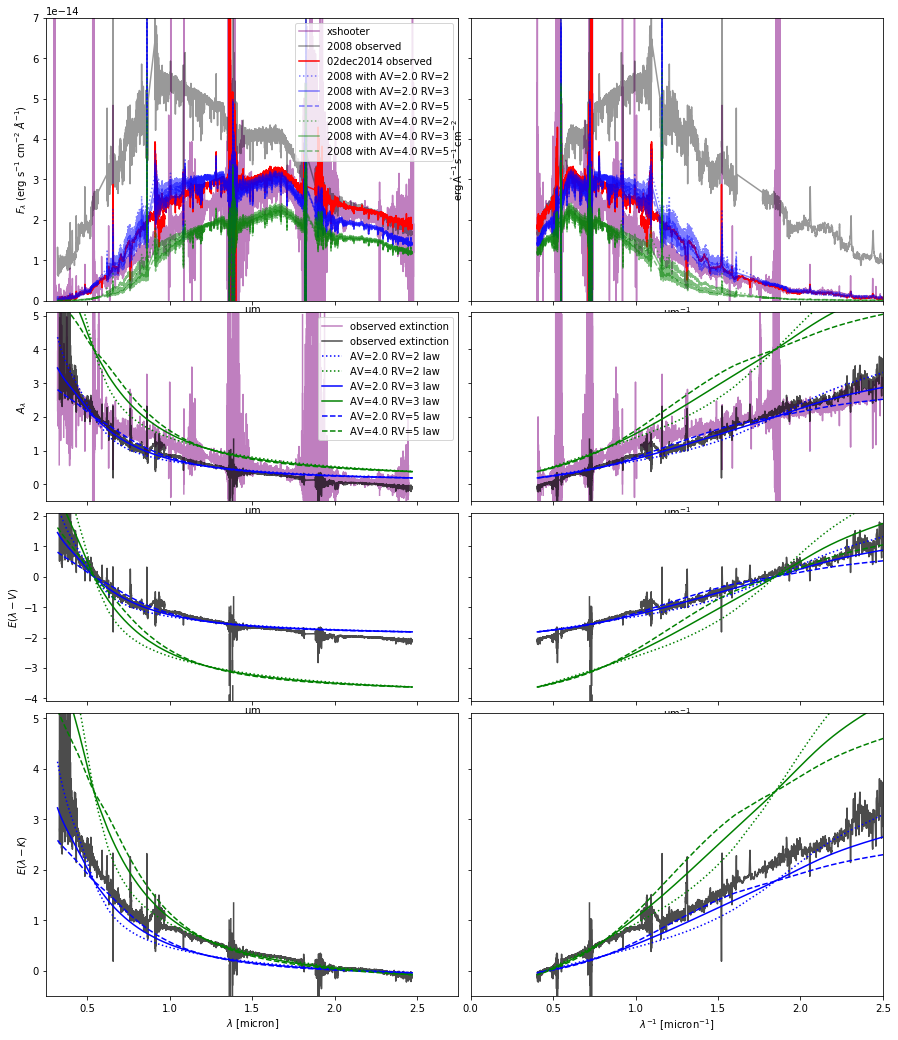

In [92]:
fig,axs=plt.subplots(4,2,sharex='col',sharey='row',figsize=(15,18),gridspec_kw = {'height_ratios':[3, 2, 2, 3]})

# fig.subplots_adjust(hspace=0)

axs[0,1].plot(1/(xshooter['wav'].to(u.micron)),xshooter['flux']/10.,'purple',alpha=0.5)
axs[0,0].plot(xshooter['wav'].to(u.micron),xshooter['flux']/10.,'purple',alpha=0.5,label='xshooter')

axs[0,0].plot(allwav_2008,alldata_2008,'k',alpha=0.4,label='2008 observed')
axs[0,0].plot(allwav_dec02,alldata_dec02,'red',label='02dec2014 observed')
axs[0,1].plot(1/allwav_2008,alldata_2008,'k',alpha=0.4)
axs[0,1].plot(1/allwav_dec02,alldata_dec02,'red')

axs[0,0].plot(allwav_2008,fobs1ext[0],'b',label='2008 with AV=2.0 RV=2',linestyle='dotted',alpha=0.5)
axs[0,1].plot(1/allwav_2008,fobs1ext[0],'b',linestyle='dotted',alpha=0.5)
axs[0,0].plot(allwav_2008,fobs1ext[1],'b',label='2008 with AV=2.0 RV=3',linestyle='solid',alpha=0.5)
axs[0,1].plot(1/allwav_2008,fobs1ext[1],'b',linestyle='solid',alpha=0.5)
axs[0,0].plot(allwav_2008,fobs1ext[2],'b',label='2008 with AV=2.0 RV=5',linestyle='dashed',alpha=0.5)
axs[0,1].plot(1/allwav_2008,fobs1ext[2],'b',linestyle='dashed',alpha=0.5)

axs[0,0].plot(allwav_2008,fobs1ext[3],'g',label='2008 with AV=4.0 RV=2',linestyle='dotted',alpha=0.5)
axs[0,1].plot(1/allwav_2008,fobs1ext[3],'g',linestyle='dotted',alpha=0.5)
axs[0,0].plot(allwav_2008,fobs1ext[4],'g',label='2008 with AV=4.0 RV=3',linestyle='solid',alpha=0.5)
axs[0,1].plot(1/allwav_2008,fobs1ext[4],'g',linestyle='solid',alpha=0.5)
axs[0,0].plot(allwav_2008,fobs1ext[5],'g',label='2008 with AV=4.0 RV=5',linestyle='dashed',alpha=0.5)
axs[0,1].plot(1/allwav_2008,fobs1ext[5],'g',linestyle='dashed',alpha=0.5)


axs[0,0].set_xlim(0.25,2.75)
axs[0,0].set_ylim(0,0.7E-13)
axs[0,0].set_ylabel('$F_\lambda$ (erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
axs[0,0].legend(loc='best')
axs[0,1].set_xlim(0,2.5)
axs[0,1].set_ylim(0,0.7E-13)


ext_dec02=-2.5*np.log10(alldata_dec02.value/interp2008(allwav_dec02))
wav_xsho_clip=xshooter['wav'].to(u.micron)[1100:-500]
ext_xsho_clip=-2.5*np.log10((xshooter['flux'][1100:-500].value/10)/interp2008(wav_xsho_clip))

axs[1,0].plot(wav_xsho_clip,ext_xsho_clip,'purple',alpha=0.5,label='observed extinction')
axs[1,1].plot(1./wav_xsho_clip,ext_xsho_clip,'purple',alpha=0.5)
axs[1,0].set_ylabel('$A_\lambda$')
axs[1,0].set_ylim(-0.5,5.1)
axs[1,0].plot(allwav_dec02,ext_dec02,'k',alpha=0.7,label='observed extinction')
axs[1,1].plot(1./allwav_dec02,ext_dec02,'k',alpha=0.7)

for R,line,legend in list(zip((2,3,5),('dotted','solid','dashed'),('2','3','5'))):
    ext=F99(Rv=R)
    axs[1,0].plot(allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line,label='AV=2.0 RV='+legend+' law')
    axs[1,1].plot(1/allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[1,0].plot(allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line,label='AV=4.0 RV='+legend+' law')
    axs[1,1].plot(1/allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)
axs[1,0].legend(loc='best')
        

axs[2,0].set_ylabel('$E(\lambda-V)$')      
axs[2,0].plot(allwav_dec02,ext_dec02-2.0,'k',alpha=0.7)
axs[2,1].plot(1./allwav_dec02,ext_dec02-2.0,'k',alpha=0.7)
for R,line, in list(zip((2,3,5),('dotted','solid','dashed'))):
    ext=F99(Rv=R)
    axs[2,0].plot(allwav_2008,2.0*ext(allwav_2008)-2.0,'b',linestyle=line)
    axs[2,1].plot(1/allwav_2008,2.0*ext(allwav_2008)-2.0,'b',linestyle=line)
    axs[2,0].plot(allwav_2008,4.0*ext(allwav_2008)-4.0,'g',linestyle=line)
    axs[2,1].plot(1/allwav_2008,4.0*ext(allwav_2008)-4.0,'g',linestyle=line)
axs[2,0].set_ylim(-4.1,2.1)


AH=mags2[1]-mags1[1]
AK=mags2[0]-mags1[0]
AHext=mags1ext[:,1]-mags1[1]
AKext=mags1ext[:,0]-mags1[0]

axs[3,0].set_ylabel('$E(\lambda-K)$')      
axs[3,0].plot(allwav_dec02,(ext_dec02-AK),'k',alpha=0.7,label='2008 -> 2014')
axs[3,1].plot(1./allwav_dec02,(ext_dec02-AK),'k',alpha=0.7)
for R,line, in list(zip((2,3,5),('dotted','solid','dashed'))):
    ext=F99(Rv=R)
    axs[3,0].plot(allwav_2008,(2.0*ext(allwav_2008)-AKext[j]),'b',linestyle=line)
    axs[3,1].plot(1/allwav_2008,(2.0*ext(allwav_2008)-AKext[j]),'b',linestyle=line)
    axs[3,0].plot(allwav_2008,(4.0*ext(allwav_2008)-AKext[j+3]),'g',linestyle=line)
    axs[3,1].plot(1/allwav_2008,(4.0*ext(allwav_2008)-AKext[j+3]),'g',linestyle=line)
axs[3,0].set_ylim(-0.5,5.1)

axs[3,0].set_xlabel('$\lambda$ [micron]')
axs[3,1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')


fig.subplots_adjust(hspace=0.05)
fig.subplots_adjust(wspace=0.03)

plt.show()